# Algorithm comparison

**Goal:** first work on the classifier
  
This notebook is divided in two parts:
* **1. Bla**

In [1]:
%run ../setup_environment.ipy
%run ../selene_job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

In [2]:
summary = Summary()

## Get the data

In [3]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_driver')

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type', 'VEP_SIFT_class', 'VEP_PolyPhen_class']

X, y = data.process(features).get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X, y)

X: (187012, 54) | y: (187012,)


,count_,freq_
False,123329,65.95%
True,63683,34.05%


In [4]:
X.head()

,t_depth,t_vaf,t_alt_count,n_depth,n_vaf,n_alt_count,sample_coverage,frequency_in_normals,VEP_COSMIC_CNT,VEP_gnomAD_AF,VEP_gnomAD_total_AF_AFR,VEP_gnomAD_total_AF_AMR,VEP_gnomAD_total_AF_ASJ,VEP_gnomAD_total_AF_EAS,VEP_gnomAD_total_AF_FIN,VEP_gnomAD_total_AF_NFE,VEP_gnomAD_total_AF_OTH,VEP_gnomAD_total_AF_max,VEP_gnomAD_total_AF,Kaviar_AF,VEP_Consequence_frameshift_variant,VEP_Consequence_inframe_deletion,VEP_Consequence_inframe_insertion,VEP_Consequence_missense_variant,VEP_Consequence_splice_acceptor_variant,VEP_Consequence_splice_donor_variant,VEP_Consequence_start_lost,VEP_Consequence_stop_gained,VEP_Consequence_stop_lost,VEP_VARIANT_CLASS_SNV,VEP_VARIANT_CLASS_deletion,VEP_VARIANT_CLASS_indel,VEP_VARIANT_CLASS_insertion,VEP_VARIANT_CLASS_substitution,VEP_IMPACT_HIGH,VEP_IMPACT_MODERATE,VEP_CLIN_SIG_benign,VEP_CLIN_SIG_pathogenic,VEP_CLIN_SIG_unknown,VEP_SIFT_class_deleterious,VEP_SIFT_class_deleterious_low_confidence,VEP_SIFT_class_tolerated,VEP_SIFT_class_tolerated_low_confidence,VEP_SIFT_class_unknown,VEP_PolyPhen_class_benign,VEP_PolyPhen_class_possibly_damaging,VEP_PolyPhen_class_probably_damaging,VEP_PolyPhen_class_unknown,VEP_in_dbSNP_False,VEP_in_dbSNP_True,gene_type_oncogene,gene_type_oncogene_and_tsg,gene_type_tsg,gene_type_unknown
83623,480.0,0.25000,120.0,627.0,0.00159,1.0,693.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
150567,1293.0,0.19180,248.0,775.0,0.00129,1.0,799.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
63359,987.0,0.79534,785.0,784.0,0.00000,0.0,201.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
128963,770.0,0.12208,94.0,344.0,0.00000,0.0,846.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
104934,592.0,0.08446,50.0,349.0,0.00000,0.0,622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Set cross-validation strategies and load some modules

We choose stratified folds (made by preserving the percentage of samples for each class) for both outer and nested cross-validation.

In [5]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [6]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

## Uniform

Generates predictions uniformly at random, expected accuracy: 0.5 | expected AUC: 0.5.

In [7]:
from sklearn.dummy import DummyClassifier

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      DummyClassifier(strategy='uniform', random_state=42))

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model... done! (6.74s)
▴ Mean average_precision: 0.341 ± 0.000
▴ Mean roc_auc          : 0.500 ± 0.000
▴ Mean precision        : 0.340 ± 0.003
▴ Mean recall           : 0.501 ± 0.004
▴ Mean f1               : 0.405 ± 0.003
▴ Mean accuracy         : 0.499 ± 0.003


In [8]:
metrics.print_fold_details()

Fold #: [fit_time | score_time]
  → score_name_1: [test_score_1 | train_score_1]
  → score_name_2: [test_score_2 | train_score_2]
  → ...

Fold 1: [0.68s | 0.04s]
  → average_precision: [0.341 | 0.341]
  → roc_auc          : [0.500 | 0.500]
  → precision        : [0.344 | 0.339]
  → recall           : [0.506 | 0.497]
  → f1               : [0.410 | 0.403]
  → accuracy         : [0.503 | 0.498]
Fold 2: [0.69s | 0.04s]
  → average_precision: [0.341 | 0.341]
  → roc_auc          : [0.500 | 0.500]
  → precision        : [0.337 | 0.340]
  → recall           : [0.496 | 0.500]
  → f1               : [0.401 | 0.405]
  → accuracy         : [0.496 | 0.500]
Fold 3: [0.66s | 0.04s]
  → average_precision: [0.341 | 0.341]
  → roc_auc          : [0.500 | 0.500]
  → precision        : [0.339 | 0.340]
  → recall           : [0.499 | 0.500]
  → f1               : [0.404 | 0.405]
  → accuracy         : [0.498 | 0.500]
Fold 4: [0.65s | 0.04s]
  → average_precision: [0.341 | 0.341]
  → roc_auc          : [

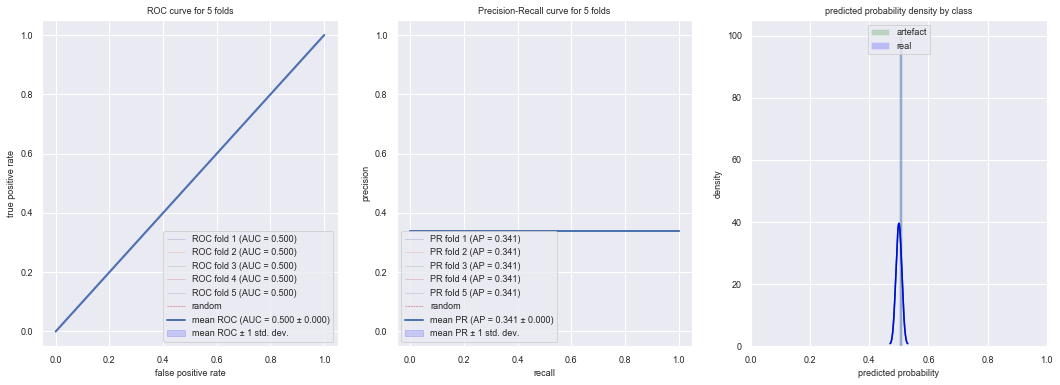

In [9]:
metrics.plot_threshold_decision_curves(figsize=(18, 6), plot_thresholds=False)

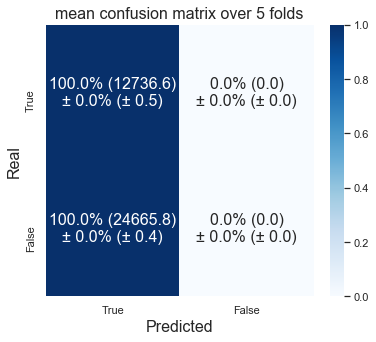

In [10]:
metrics.plot_mean_confusion_matrix()

In [11]:
#metrics.get_learning_curves_metrics()
#metrics.plot_learning_curves(figsize=(6, 6))

In [12]:
summary.add(metrics, 'Uniform', 'mediumseagreen')

## Most Frequent

Always predicts the most frequent label in the training set → expected accuracy: proportion of the most reccurent class in the dataset | expected AUC: 0.5

In [13]:
model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      DummyClassifier(strategy='most_frequent', random_state=42))

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model...

/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/guilminp/anaconda3/lib/python3.6/site

 done! (6.21s)
▴ Mean average_precision: 0.341 ± 0.000
▴ Mean roc_auc          : 0.500 ± 0.000
▴ Mean precision        : 0.000 ± 0.000
▴ Mean recall           : 0.000 ± 0.000
▴ Mean f1               : 0.000 ± 0.000
▴ Mean accuracy         : 0.659 ± 0.000


In [14]:
metrics.print_fold_details()

Fold #: [fit_time | score_time]
  → score_name_1: [test_score_1 | train_score_1]
  → score_name_2: [test_score_2 | train_score_2]
  → ...

Fold 1: [0.62s | 0.03s]
  → average_precision: [0.341 | 0.341]
  → roc_auc          : [0.500 | 0.500]
  → precision        : [0.000 | 0.000]
  → recall           : [0.000 | 0.000]
  → f1               : [0.000 | 0.000]
  → accuracy         : [0.659 | 0.659]
Fold 2: [0.60s | 0.03s]
  → average_precision: [0.341 | 0.341]
  → roc_auc          : [0.500 | 0.500]
  → precision        : [0.000 | 0.000]
  → recall           : [0.000 | 0.000]
  → f1               : [0.000 | 0.000]
  → accuracy         : [0.659 | 0.659]
Fold 3: [0.61s | 0.03s]
  → average_precision: [0.341 | 0.341]
  → roc_auc          : [0.500 | 0.500]
  → precision        : [0.000 | 0.000]
  → recall           : [0.000 | 0.000]
  → f1               : [0.000 | 0.000]
  → accuracy         : [0.659 | 0.659]
Fold 4: [0.60s | 0.03s]
  → average_precision: [0.341 | 0.341]
  → roc_auc          : [

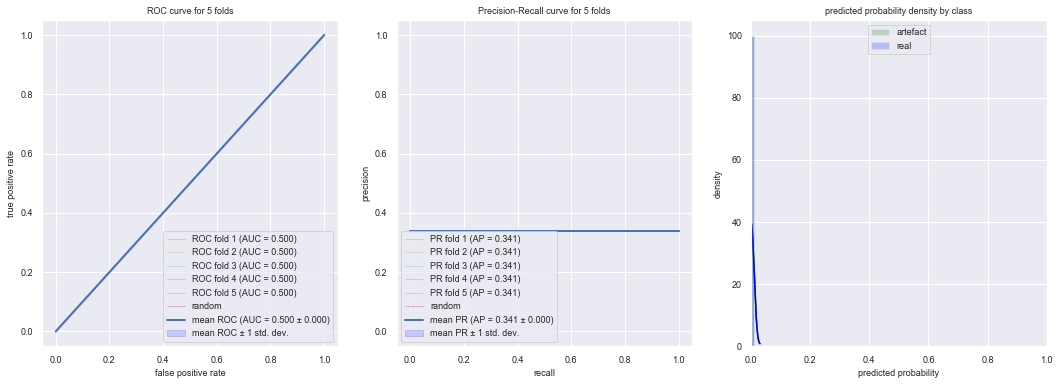

In [15]:
metrics.plot_threshold_decision_curves(figsize=(18, 6), plot_thresholds=False)

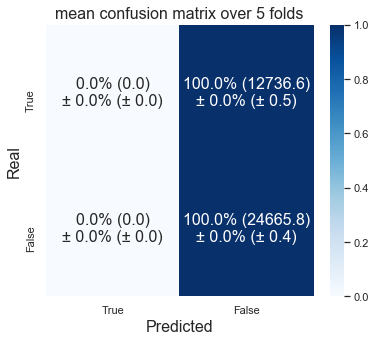

In [16]:
metrics.plot_mean_confusion_matrix()

In [17]:
summary.add(metrics, 'MostFrequent', 'seagreen')

## Gaussian Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      StandardScaler(),
                      GaussianNB())

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model... done! (21.80s)
▴ Mean average_precision: 0.854 ± 0.004
▴ Mean roc_auc          : 0.932 ± 0.001
▴ Mean precision        : 0.813 ± 0.005
▴ Mean recall           : 0.873 ± 0.004
▴ Mean f1               : 0.842 ± 0.003
▴ Mean accuracy         : 0.888 ± 0.002


In [19]:
metrics.print_fold_details()

Fold #: [fit_time | score_time]
  → score_name_1: [test_score_1 | train_score_1]
  → score_name_2: [test_score_2 | train_score_2]
  → ...

Fold 1: [0.82s | 0.43s]
  → average_precision: [0.851 | 0.850]
  → roc_auc          : [0.933 | 0.932]
  → precision        : [0.815 | 0.814]
  → recall           : [0.877 | 0.875]
  → f1               : [0.845 | 0.843]
  → accuracy         : [0.890 | 0.889]
Fold 2: [0.91s | 0.46s]
  → average_precision: [0.850 | 0.848]
  → roc_auc          : [0.933 | 0.932]
  → precision        : [0.805 | 0.809]
  → recall           : [0.877 | 0.877]
  → f1               : [0.839 | 0.842]
  → accuracy         : [0.886 | 0.888]
Fold 3: [0.96s | 0.50s]
  → average_precision: [0.851 | 0.856]
  → roc_auc          : [0.930 | 0.932]
  → precision        : [0.812 | 0.814]
  → recall           : [0.867 | 0.870]
  → f1               : [0.839 | 0.841]
  → accuracy         : [0.886 | 0.888]
Fold 4: [0.97s | 0.49s]
  → average_precision: [0.860 | 0.857]
  → roc_auc          : [

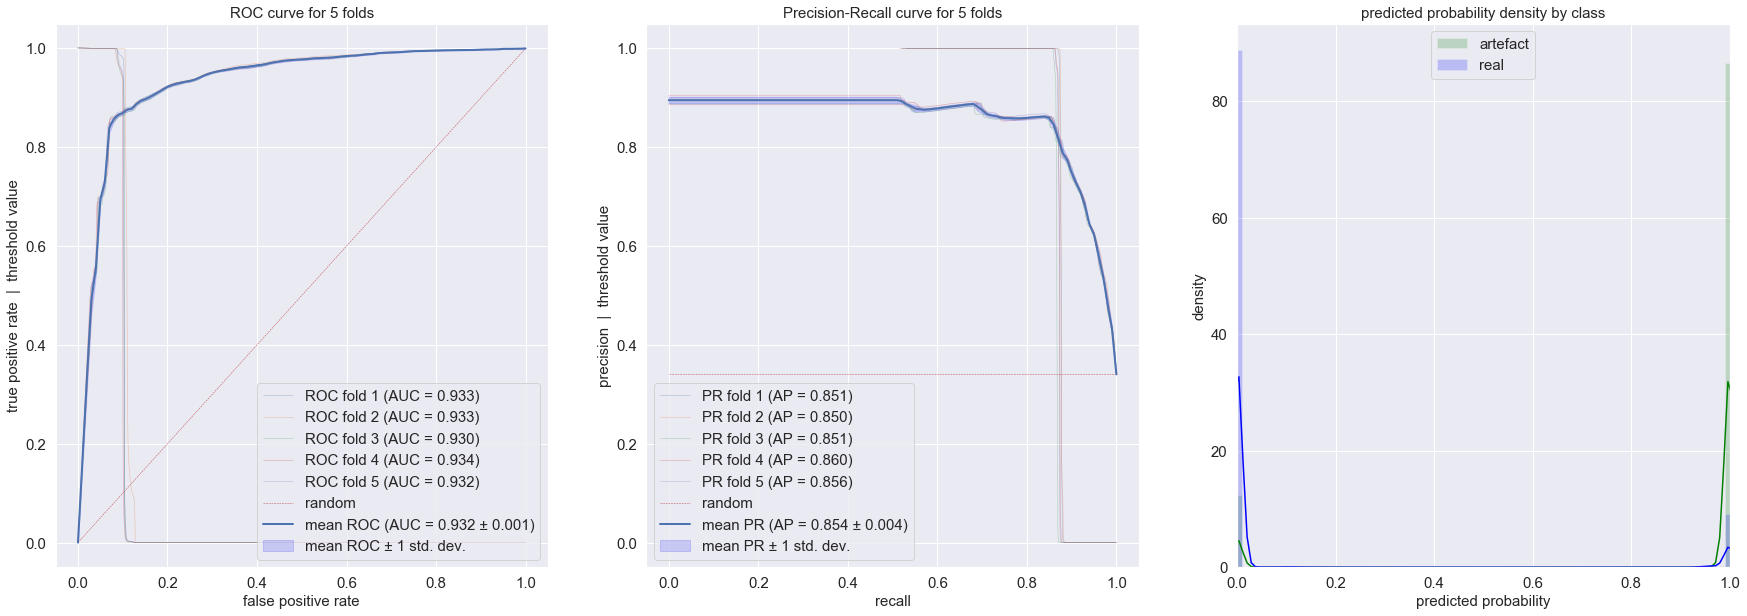

In [20]:
metrics.plot_threshold_decision_curves()

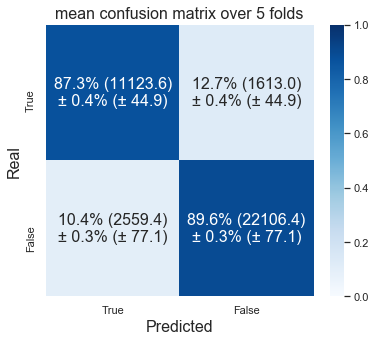

In [21]:
metrics.plot_mean_confusion_matrix()

In [22]:
summary.add(metrics, 'GausssianNaiveBayes', 'darkgoldenrod')

## Ridge regression (L2 regularization)

This model performs an automatic grid search over its parameters.

In [23]:
from sklearn.linear_model import LogisticRegressionCV

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      StandardScaler(),
                      LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42, max_iter=1000))

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model... done! (269.39s)
▴ Mean average_precision: 0.957 ± 0.002
▴ Mean roc_auc          : 0.969 ± 0.002
▴ Mean precision        : 0.882 ± 0.002
▴ Mean recall           : 0.900 ± 0.006
▴ Mean f1               : 0.891 ± 0.003
▴ Mean accuracy         : 0.925 ± 0.002


In [24]:
metrics.print_fold_details()

Fold #: [fit_time | score_time]
  → score_name_1: [test_score_1 | train_score_1]
  → score_name_2: [test_score_2 | train_score_2]
  → ...

Fold 1: [66.64s | 0.34s]
  → average_precision: [0.959 | 0.958]
  → roc_auc          : [0.971 | 0.970]
  → precision        : [0.884 | 0.882]
  → recall           : [0.906 | 0.906]
  → f1               : [0.895 | 0.894]
  → accuracy         : [0.927 | 0.927]
Fold 2: [49.72s | 0.32s]
  → average_precision: [0.959 | 0.958]
  → roc_auc          : [0.971 | 0.970]
  → precision        : [0.879 | 0.883]
  → recall           : [0.907 | 0.905]
  → f1               : [0.893 | 0.894]
  → accuracy         : [0.926 | 0.927]
Fold 3: [43.79s | 0.33s]
  → average_precision: [0.954 | 0.956]
  → roc_auc          : [0.966 | 0.968]
  → precision        : [0.881 | 0.883]
  → recall           : [0.893 | 0.896]
  → f1               : [0.887 | 0.890]
  → accuracy         : [0.923 | 0.924]
Fold 4: [50.08s | 0.33s]
  → average_precision: [0.958 | 0.955]
  → roc_auc         

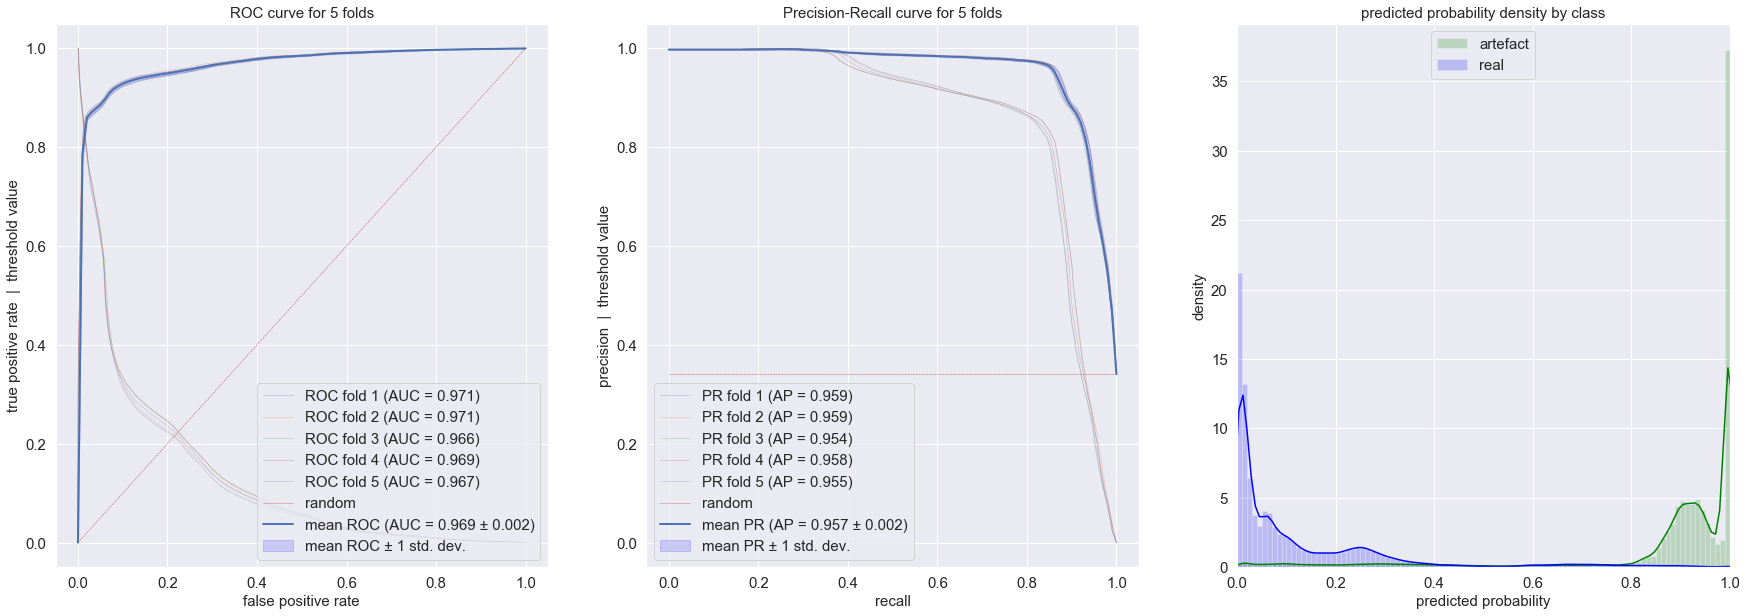

In [25]:
metrics.plot_threshold_decision_curves()

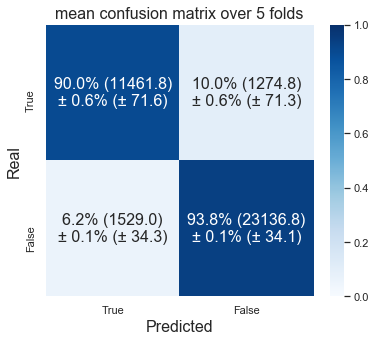

In [26]:
metrics.plot_mean_confusion_matrix()

In [27]:
summary.add(metrics, 'RidgeRegression', 'salmon')

"If your variables are positively correlated, then the coefficients will be negatively correlated, which can lead to a wrong sign on one of the coefficients.", see https://stats.stackexchange.com/questions/1580/regression-coefficients-that-flip-sign-after-including-other-predictors.

/Users/guilminp/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


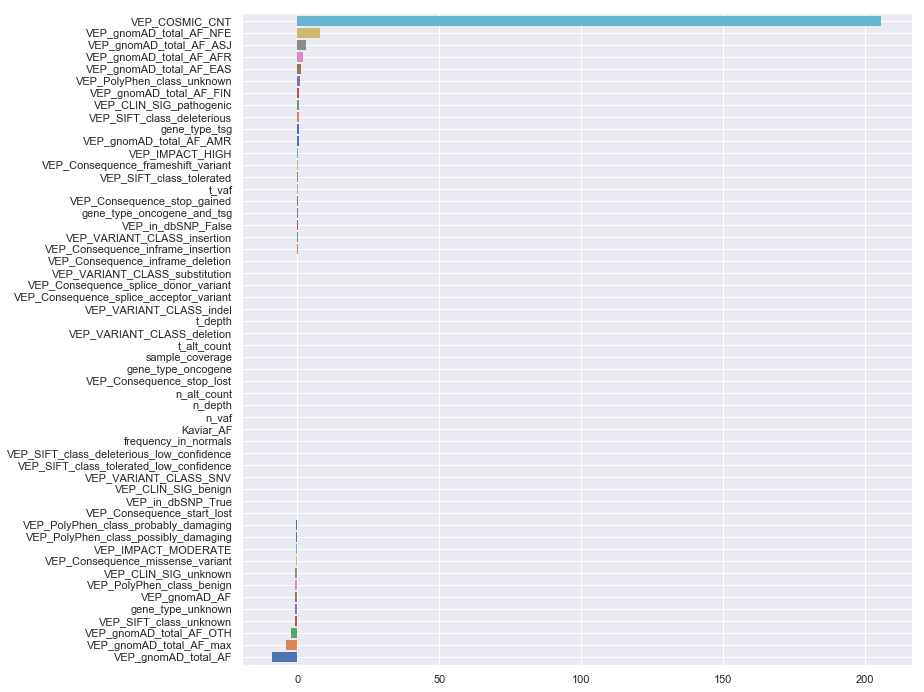

In [28]:
model.fit(X, y)

feature_coefficient = pd.DataFrame({'coeff': model.named_steps['logisticregressioncv'].coef_[0]}, index=X.columns.tolist())
feature_coefficient.sort_values(by='coeff', axis=0, inplace=True)

plt.figure(figsize = (12, 12))
feature_coefficient.coeff.plot.barh(width=0.85, linewidth=0);

## Lasso regression (L1 regularization)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      StandardScaler(),
                      LogisticRegressionCV(cv=nested_cv_strategy, penalty='l1', solver='liblinear', scoring='roc_auc', random_state=42, max_iter=1000))

metrics = Metrics(model, X, y, cv_strategy)
metrics.print_mean()

Run model...

In [ ]:
metrics.plot_threshold_decision_curves()

In [ ]:
metrics.plot_mean_confusion_matrix()

In [ ]:
summary.add(metrics, 'LassoRegression', 'crimson')

We change the regularization to make it stronger (otherwise we get the same result as for the ridge regression previously):

In [ ]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                      StandardScaler(),
                      LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=0.01))
model.fit(X, y)

feature_coefficient = pd.DataFrame({'coeff': model.named_steps['logisticregression'].coef_[0]}, index=X.columns.tolist())
feature_coefficient.sort_values(by='coeff', axis=0, inplace=True)

plt.figure(figsize = (12, 12))
feature_coefficient.coeff.plot.barh(width=0.85, linewidth=0);

## K Nearest Neighbors

In [41]:
job = Selene_Job('kNN', 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs')

<span style="color:red">Job < kNN >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

In [37]:
job = Selene_Job('kNN', 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < kNN >: </span>✅ job found and reloaded

In [59]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_kNN


<span style="color:green">Job < kNN >: </span>✅ data loaded

In [60]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# choose a model and run it
from sklearn.neighbors import KNeighborsClassifier
parameters_grid = [
    {'kneighborsclassifier__n_neighbors': [5, 10, 20, 25, 30, 40, 50, 60, 100], 'kneighborsclassifier__weights': ['uniform', 'distance']}
]
pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                     StandardScaler(),
                     KNeighborsClassifier())

model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ../ssh_remote_jobs/job_kNN/script.ipy


In [61]:
job.run(n_jobs=5, short_job=False)

➞ scp ../ssh_remote_jobs/job_kNN to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1346   160.5KB/s   00:00    
metrics.pkl                                   100%  332KB   5.0MB/s   00:00    
script.ipy                                    100% 1202   145.0KB/s   00:00    
X.pkl                                         100%   44MB  11.1MB/s   00:04    
y.pkl                                         100% 3225KB  11.5MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_kNN
Job <29039673> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J kNN -n 5 -R "span[ptile=5]" "ipython script.ipy"


<span style="color:green">Job < kNN >: </span>✅ submitted<br>

In [38]:
job.get_results()

<span style="color:green">Job < kNN >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_kNN to ../ssh_remote_jobs/job_kNN
metrics.pkl                                   100% 6503KB   4.2MB/s   00:01    
job_output.txt                                100% 1471   443.1KB/s   00:00    
➞ load metrics.pkl in object self.metrics


▴ Mean average_precision: 0.475 ± 0.016
▴ Mean roc_auc          : 0.860 ± 0.007
▴ Mean precision        : 0.185 ± 0.007
▴ Mean recall           : 0.692 ± 0.014
▴ Mean f1               : 0.292 ± 0.009
▴ Mean accuracy         : 0.876 ± 0.005


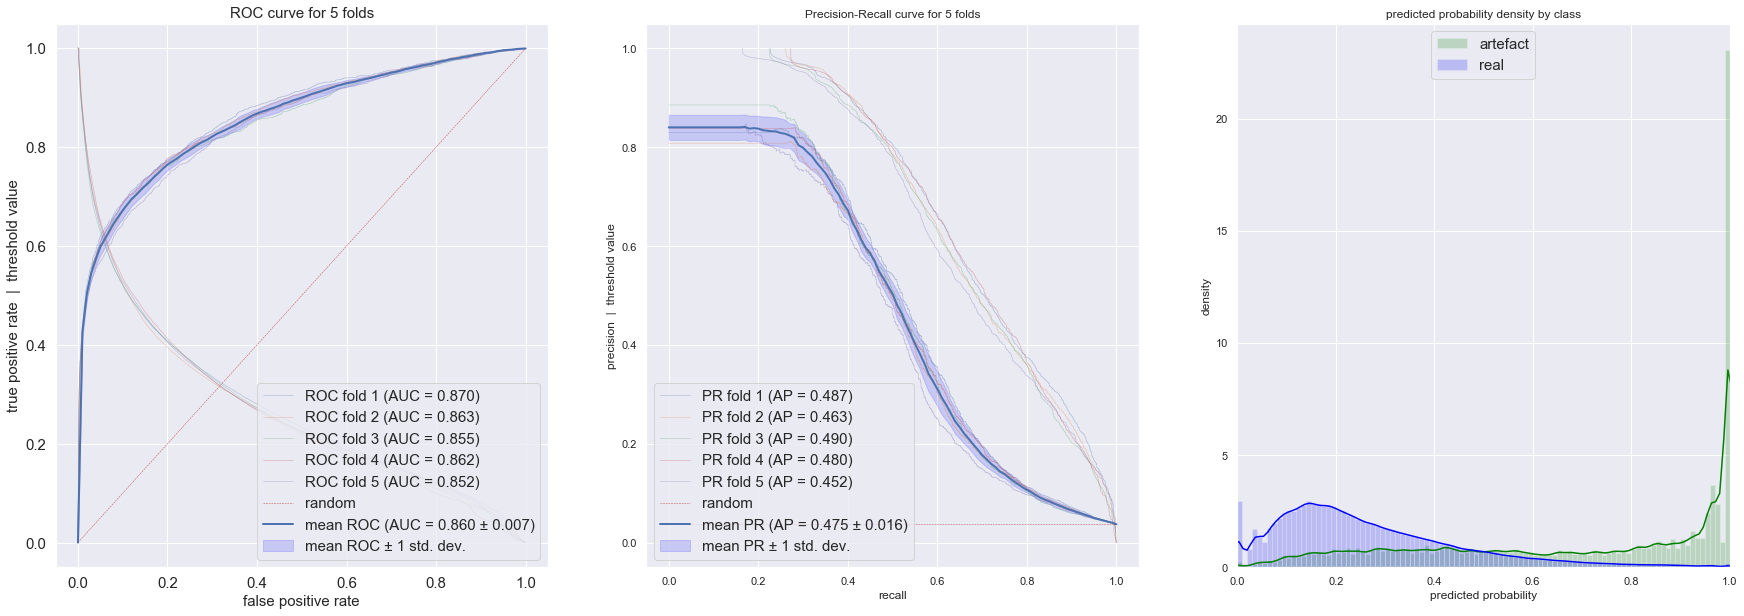

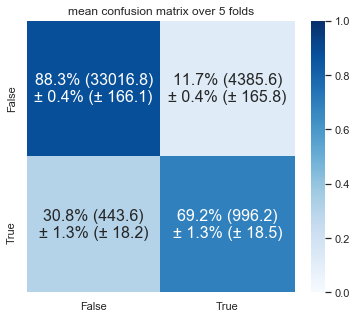

In [64]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

2 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → kneighborsclassifier__n_neighbors: [5 10 20 25 30 40 50 60 100]
  → kneighborsclassifier__weights    : ['distance' 'uniform']
Best hyperparameters for each fold:
fold 0: {'kneighborsclassifier__n_neighbors': 30, 'kneighborsclassifier__weights': 'distance'}
fold 1: {'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'distance'}
fold 2: {'kneighborsclassifier__n_neighbors': 25, 'kneighborsclassifier__weights': 'distance'}
fold 3: {'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'distance'}
fold 4: {'kneighborsclassifier__n_neighbors': 40, 'kneighborsclassifier__weights': 'distance'}


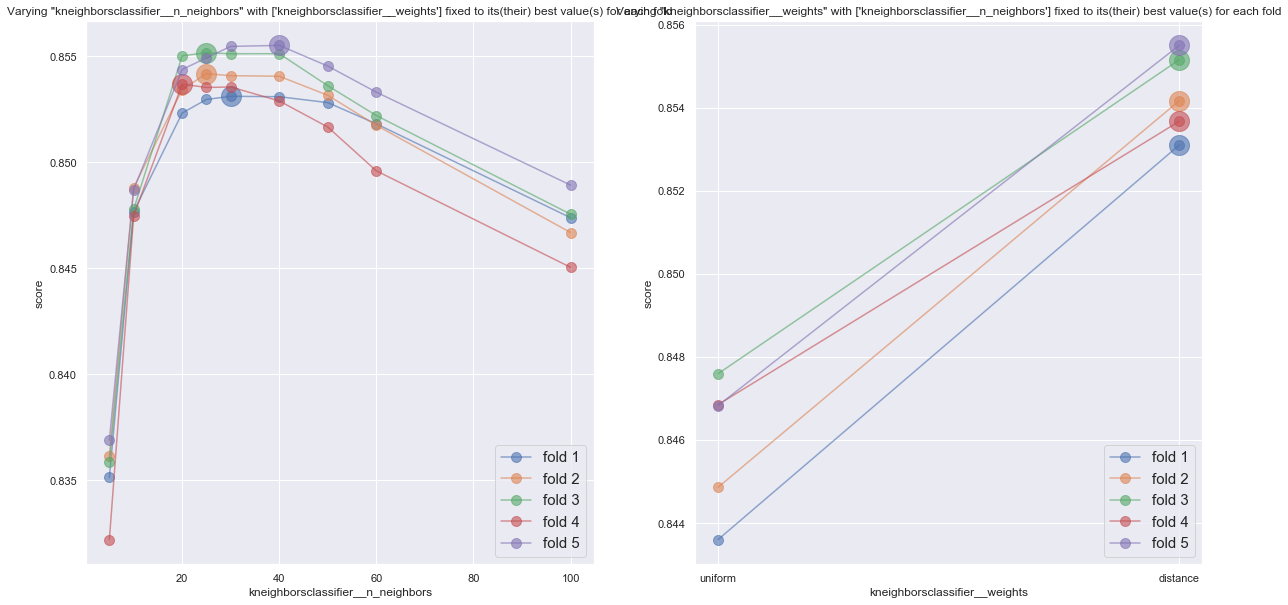

In [37]:
job.metrics.plot_grid_search_results(plot_error_bar = False)

In [38]:
summary.add(job.metrics, 'kNN', 'maroon')

## Support Vector Machine

In [63]:
job = Selene_Job('SVM', 'guilminp', '/home/guilminp/impact-annotator', 'ssh_remote_jobs')

<span style="color:red">Job < SVM >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

In [39]:
job = Selene_Job('SVM', 'guilminp', '/home/guilminp/impact-annotator', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < SVM >: </span>✅ job found and reloaded

In [67]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_SVM


<span style="color:green">Job < SVM >: </span>✅ data loaded

In [68]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# choose a model and run it
from sklearn.svm import SVC
parameters_grid = [
    {'svc__C': [0.1, 0.8, 0.9, 1.0, 5, 7, 8, 9, 10, 11, 12, 13, 15, 20, 30], 'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
]
pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                     StandardScaler(),
                     SVC(probability=True, cache_size=1000, gamma='scale'))
model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ../ssh_remote_jobs/job_SVM/script.ipy


In [69]:
job.run(n_jobs=5, short_job=False, memory=8)

➞ scp ../ssh_remote_jobs/job_SVM to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1471    51.1KB/s   00:00    
metrics.pkl                                   100%  583KB   3.9MB/s   00:00    
script.ipy                                    100% 1200    36.9KB/s   00:00    
X.pkl                                         100%   44MB  12.3MB/s   00:03    
y.pkl                                         100% 3225KB  11.6MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_SVM
Job <29039704> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J SVM -n 5 -R "span[ptile=5,mem=8]" "ipython script.ipy"


<span style="color:green">Job < SVM >: </span>✅ submitted<br>

In [40]:
job.get_results()

<span style="color:green">Job < SVM >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_SVM to ../ssh_remote_jobs/job_SVM
metrics.pkl                                   100% 6596KB   6.6MB/s   00:00    
job_output.txt                                100% 1475    50.7KB/s   00:00    
➞ load metrics.pkl in object self.metrics


▴ Mean average_precision: 0.446 ± 0.007
▴ Mean roc_auc          : 0.857 ± 0.008
▴ Mean precision        : 0.228 ± 0.008
▴ Mean recall           : 0.674 ± 0.014
▴ Mean f1               : 0.341 ± 0.008
▴ Mean accuracy         : 0.903 ± 0.004


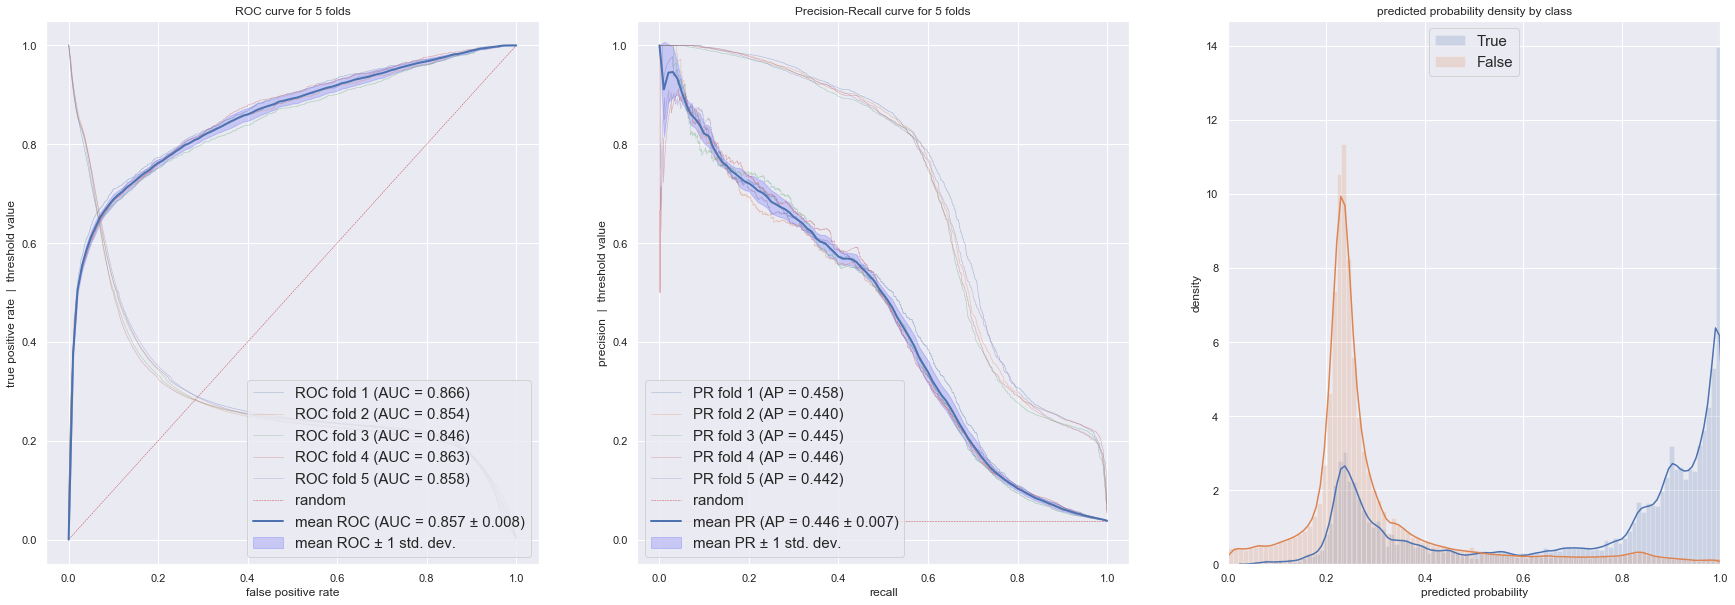

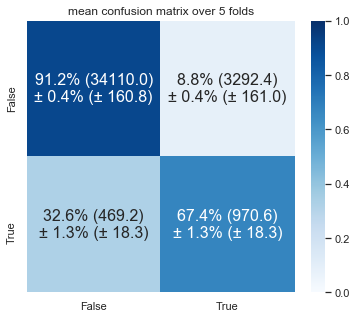

In [41]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

2 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → svc__C     : [0.1 0.8 0.9 1.0 5 7 8 9 10 11 12 13 15 20 30]
  → svc__kernel: ['linear' 'poly' 'rbf' 'sigmoid']
Best hyperparameters for each fold:
fold 0: {'svc__C': 30, 'svc__kernel': 'rbf'}
fold 1: {'svc__C': 30, 'svc__kernel': 'rbf'}
fold 2: {'svc__C': 30, 'svc__kernel': 'rbf'}
fold 3: {'svc__C': 30, 'svc__kernel': 'rbf'}
fold 4: {'svc__C': 30, 'svc__kernel': 'rbf'}


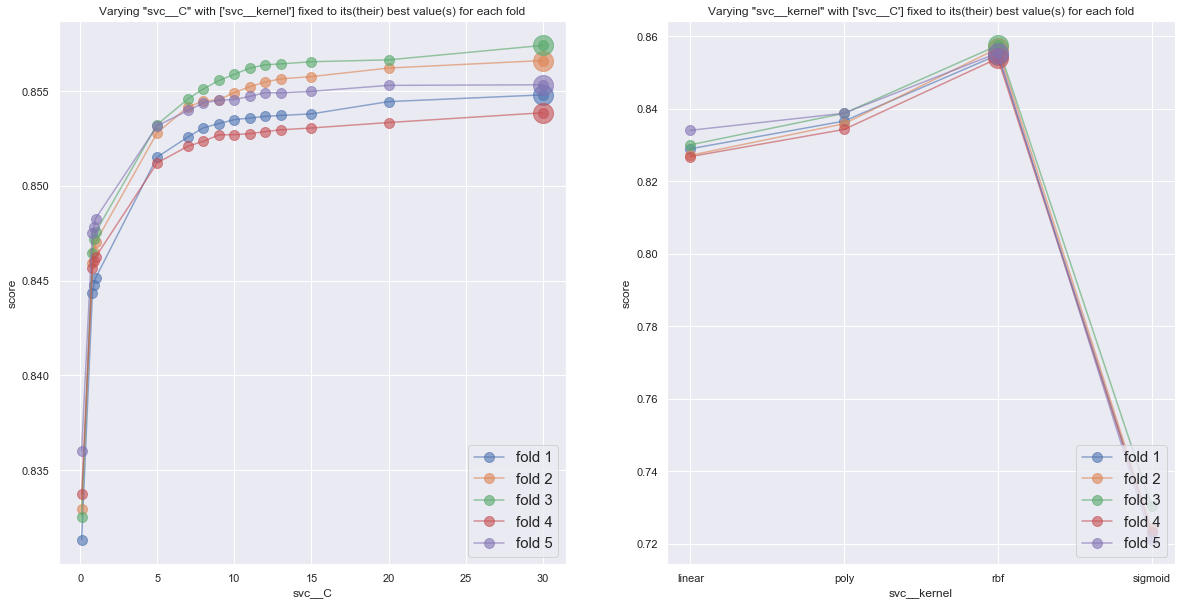

In [42]:
job.metrics.plot_grid_search_results(plot_error_bar = False)

In [43]:
summary.add(job.metrics, 'SVM', 'grey')

## Random Forest

In [71]:
job = Selene_Job('RandomForest', 'guilminp', '/home/guilminp/impact-annotator', 'ssh_remote_jobs')

<span style="color:red">Job < RandomForest >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

In [63]:
job = Selene_Job('RandomForest', 'guilminp', '/home/guilminp/impact-annotator', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < RandomForest >: </span>✅ job found and reloaded

In [97]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest


<span style="color:green">Job < RandomForest >: </span>✅ data loaded

In [49]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# choose a model and run it
from sklearn.ensemble import RandomForestClassifier
parameters_grid = [
    {'randomforestclassifier__n_estimators': [100, 500, 1000, 1500], 'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 100, 200]}
]

pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                     RandomForestClassifier(random_state=42))
model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ../ssh_remote_jobs/job_RandomForest/script.ipy


In [50]:
job.run(n_jobs=20, short_job=False, memory=32)

➞ scp ../ssh_remote_jobs/job_RandomForest to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output-checkpoint.txt                     100% 1501     3.6KB/s   00:00    
script-checkpoint.ipy                         100%  935    28.5KB/s   00:00    
job_output.txt                                100% 1501    11.4KB/s   00:00    
metrics.pkl                                   100%  483KB   2.3MB/s   00:00    
script.ipy                                    100% 1238     8.9KB/s   00:00    
X.pkl                                         100%   44MB   2.3MB/s   00:19    
y.pkl                                         100% 3225KB   3.1MB/s   00:01    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest
Job <29087398> is submitted to default queue <

<span style="color:green">Job < RandomForest >: </span>✅ submitted<br>

In [64]:
job.get_results()

<span style="color:green">Job < RandomForest >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest to ../ssh_remote_jobs/job_RandomForest
metrics.pkl                                   100% 6464KB   6.9MB/s   00:00    
job_output.txt                                100% 1503   431.6KB/s   00:00    
➞ load metrics.pkl in object self.metrics


▴ Mean average_precision: 0.588 ± 0.014
▴ Mean roc_auc          : 0.894 ± 0.004
▴ Mean precision        : 0.226 ± 0.010
▴ Mean recall           : 0.734 ± 0.012
▴ Mean f1               : 0.346 ± 0.012
▴ Mean accuracy         : 0.897 ± 0.006


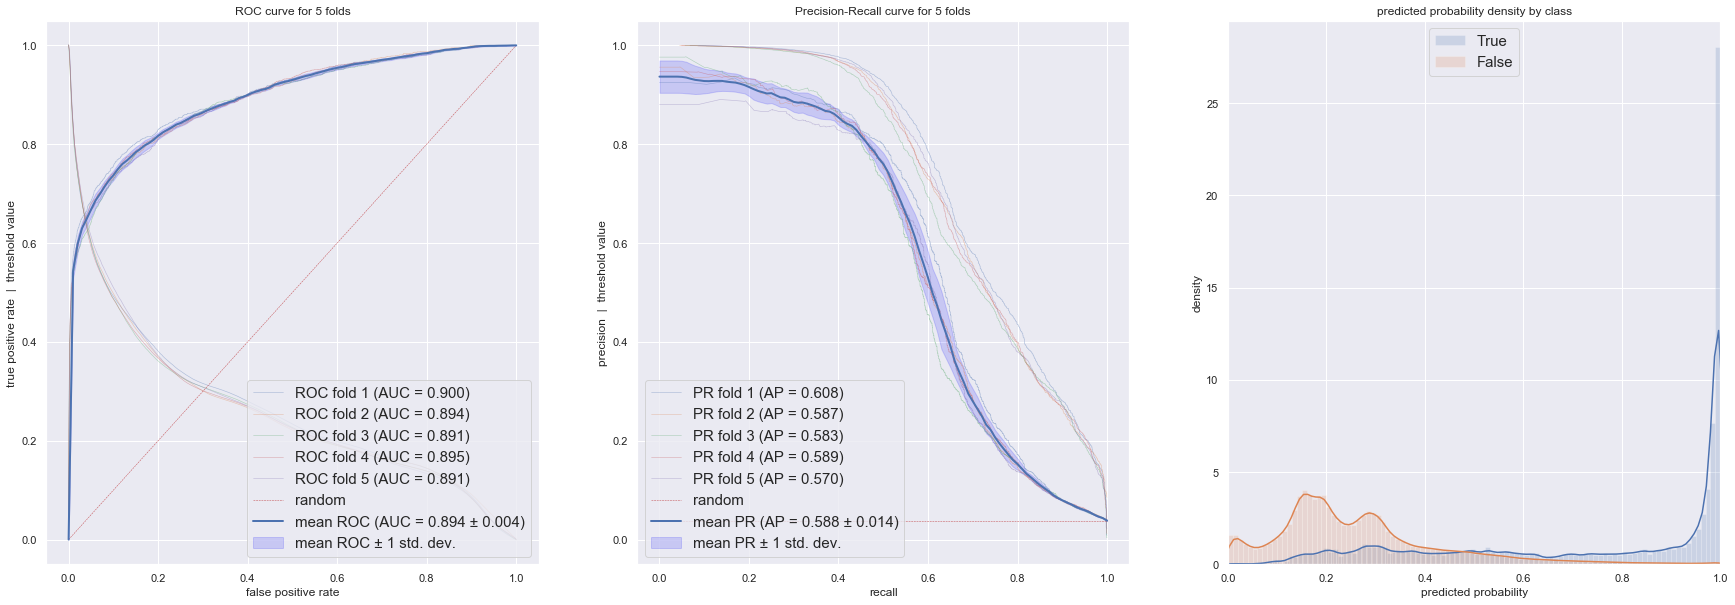

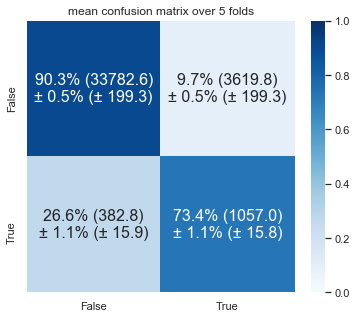

In [65]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [10 20 30 40 50 100 200]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforest

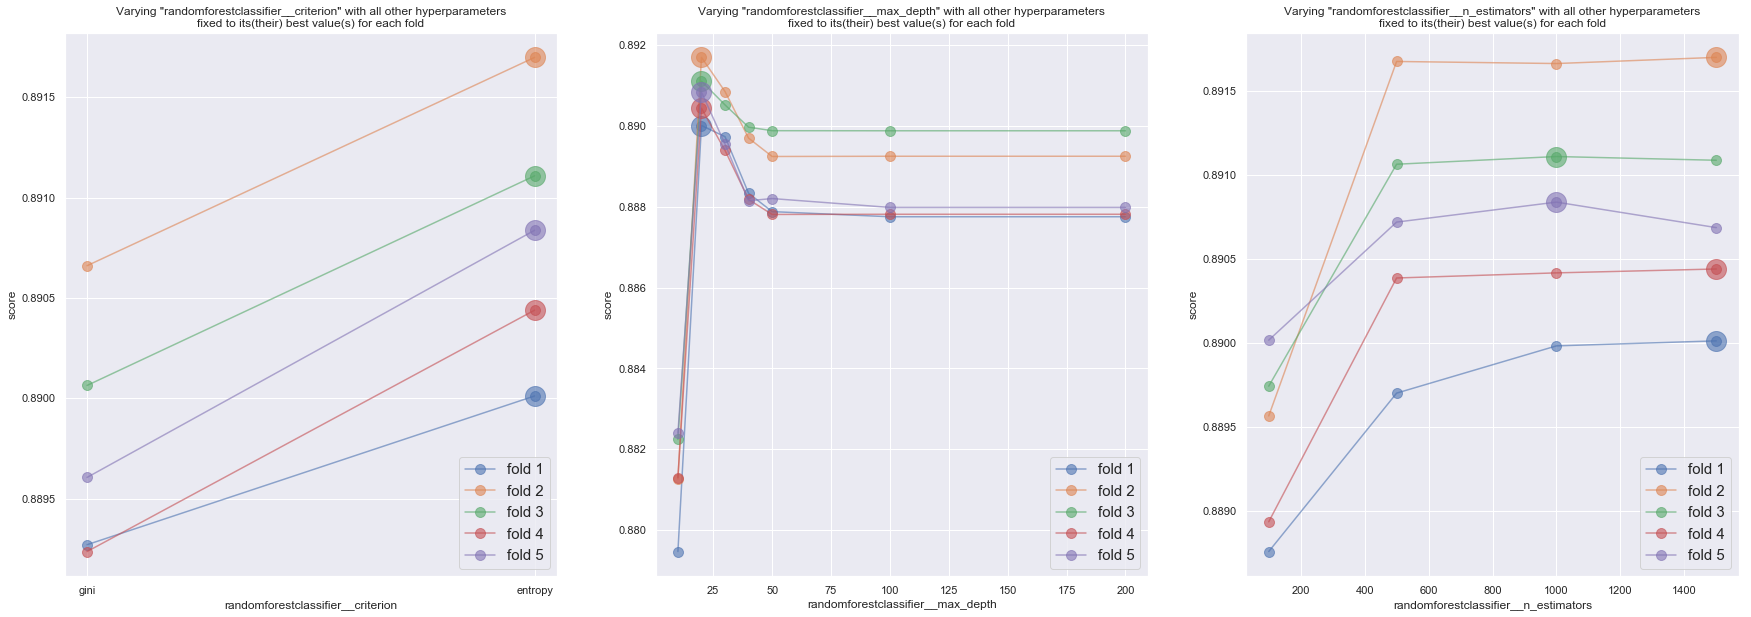

In [66]:
job.metrics.plot_grid_search_results(plot_error_bar=False)

In [67]:
summary.add(job.metrics, 'RandomForest', 'purple')

In [11]:
from sklearn.ensemble import RandomForestClassifier

model_bestRF = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                             RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=30, criterion='entropy', n_jobs=5))

metrics = Metrics(model_bestRF, X, y, cv_strategy, n_jobs=5)

Run model... done! (682.46s)


▴ Mean average_precision: 0.980 ± 0.001
▴ Mean roc_auc          : 0.986 ± 0.000
▴ Mean precision        : 0.946 ± 0.001
▴ Mean recall           : 0.938 ± 0.002
▴ Mean f1               : 0.942 ± 0.001
▴ Mean accuracy         : 0.960 ± 0.001


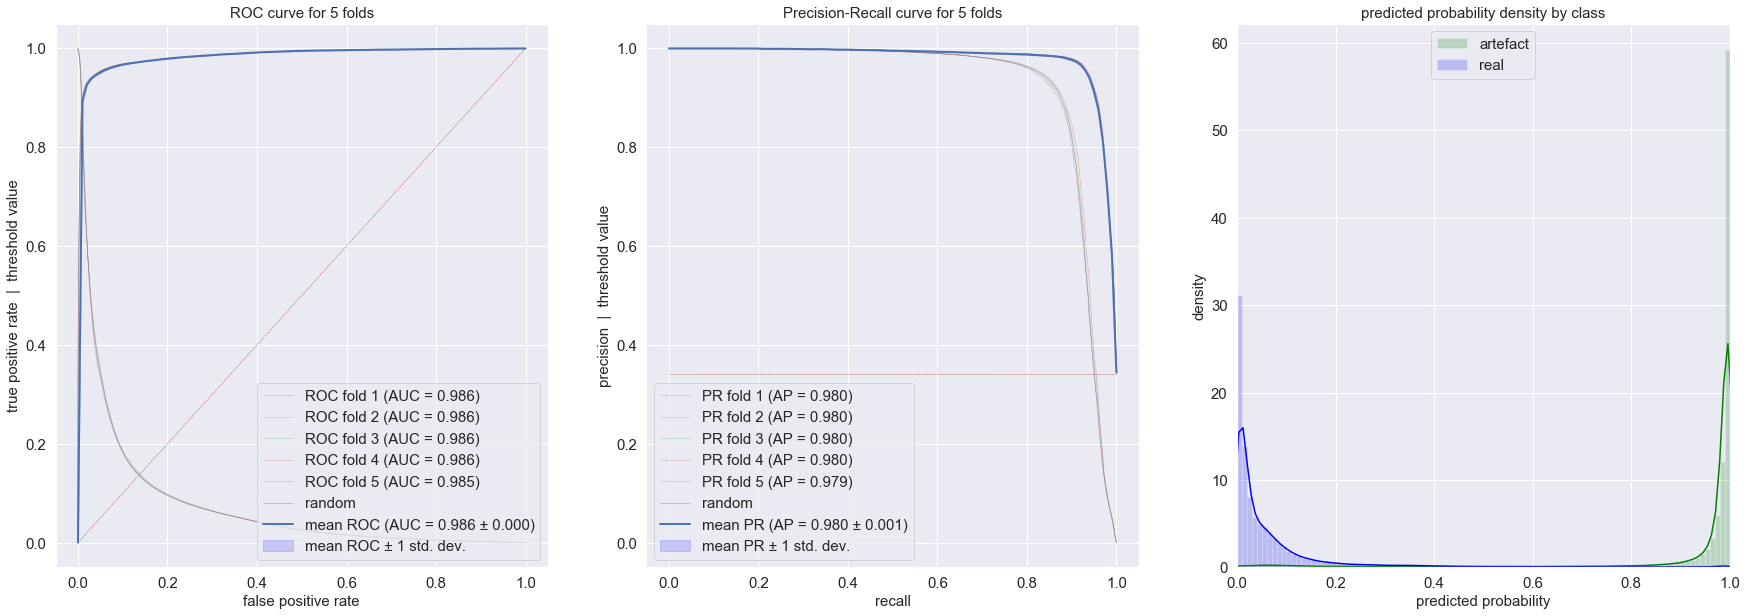

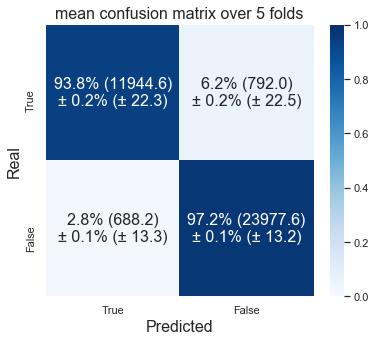

In [12]:
metrics.print_mean()
metrics.plot_threshold_decision_curves()
metrics.plot_mean_confusion_matrix()

In [ ]:
metrics.plot_features_importance(random_forest=True, pipeline_step_index=1)

## Gradient Boosting

In [101]:
job = Selene_Job('GradientBoosting', 'guilminp', '/home/guilminp/impact-annotator', 'ssh_remote_jobs')

<span style="color:red">Job < GradientBoosting >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

In [78]:
job = Selene_Job('GradientBoosting', 'guilminp', '/home/guilminp/impact-annotator', 'ssh_remote_jobs', load_from_id=True)

<span style="color:green">Job < GradientBoosting >: </span>✅ job found and reloaded

In [103]:
job.load_data(X, y)

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_GradientBoosting


<span style="color:green">Job < GradientBoosting >: </span>✅ data loaded

In [104]:
%%writefile {job.script_path}

# load the ml_tools functions
%run ../../metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# choose a model and run it
from sklearn.ensemble import GradientBoostingClassifier
parameters_grid = [
    {'gradientboostingclassifier__loss': ['deviance', 'exponential'], 'gradientboostingclassifier__learning_rate': [0.05, 0.08, 0.09, 0.1, 0.11, 0.12, 0.2], 'gradientboostingclassifier__n_estimators': [100, 500, 1000, 1500], 'gradientboostingclassifier__max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 20]}
]
pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                     GradientBoostingClassifier(random_state=42))
model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5)

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ../ssh_remote_jobs/job_GradientBoosting/script.ipy


In [105]:
job.run(n_jobs=5, short_job=False, memory=8)

➞ scp ../ssh_remote_jobs/job_GradientBoosting to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1400    24.0KB/s   00:00    
metrics.pkl                                   100% 1400KB   7.8MB/s   00:00    
script.ipy                                    100% 1351    27.0KB/s   00:00    
X.pkl                                         100%   44MB  14.8MB/s   00:03    
y.pkl                                         100% 3225KB   7.9MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_GradientBoosting
Job <29040045> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J GradientBoosting -n 5 -R "span[ptile=5,mem=8]" "ipython script.ipy"


<span style="color:green">Job < GradientBoosting >: </span>✅ submitted<br>

In [79]:
job.get_results()

<span style="color:green">Job < GradientBoosting >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_GradientBoosting to ../ssh_remote_jobs/job_GradientBoosting
metrics.pkl                                   100% 7007KB   7.3MB/s   00:00    
job_output.txt                                100% 1514   456.1KB/s   00:00    
➞ load metrics.pkl in object self.metrics


▴ Mean average_precision: 0.588 ± 0.016
▴ Mean roc_auc          : 0.897 ± 0.005
▴ Mean precision        : 0.209 ± 0.009
▴ Mean recall           : 0.763 ± 0.025
▴ Mean f1               : 0.328 ± 0.010
▴ Mean accuracy         : 0.884 ± 0.007


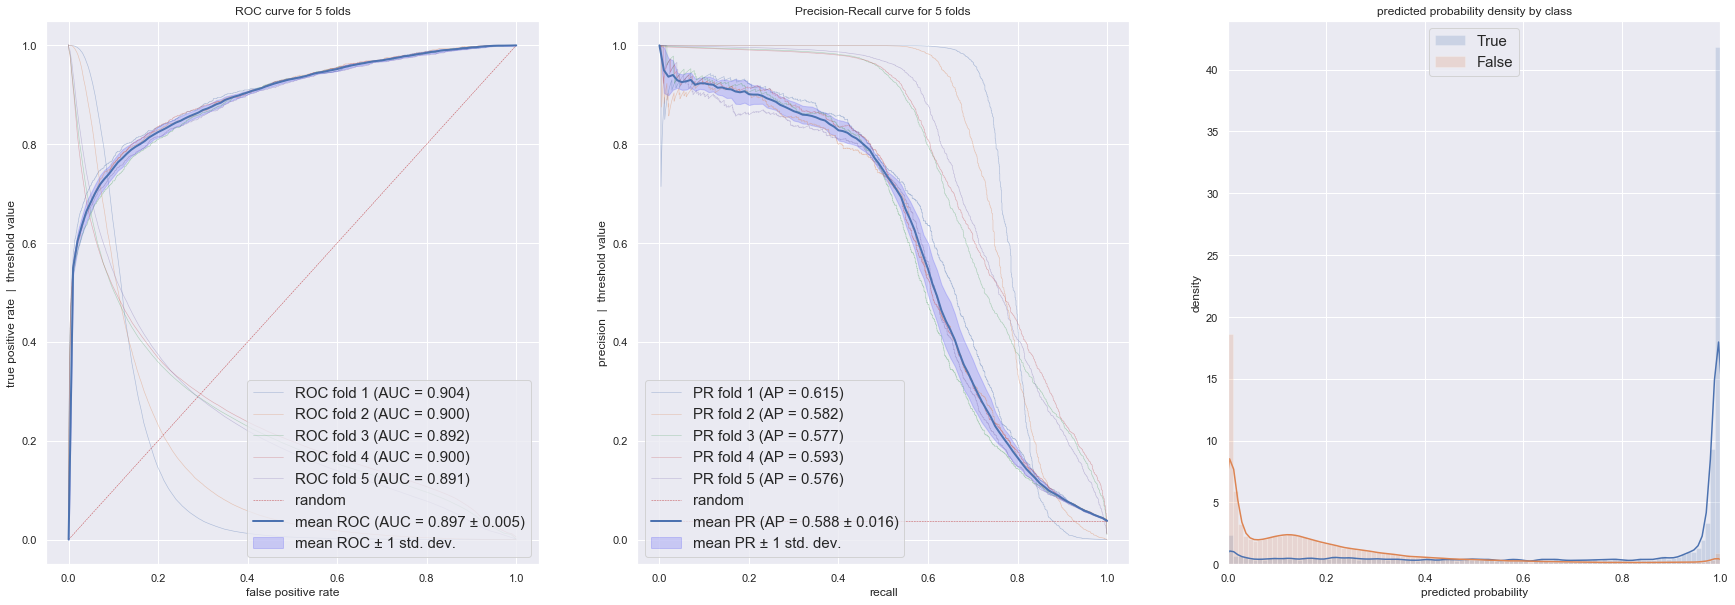

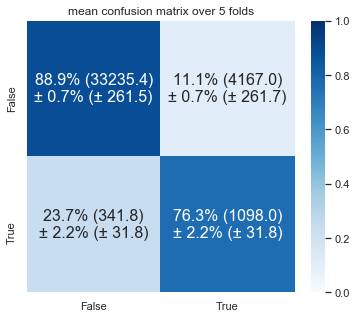

In [53]:
job.metrics.print_mean()
job.metrics.plot_threshold_decision_curves()
job.metrics.plot_mean_confusion_matrix()

4 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → gradientboostingclassifier__learning_rate: [0.05 0.08 0.09 0.1 0.11 0.12 0.2]
  → gradientboostingclassifier__loss         : ['deviance' 'exponential']
  → gradientboostingclassifier__max_depth    : [4 5 6 7 8 9 10 11 12 20]
  → gradientboostingclassifier__n_estimators : [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'gradientboostingclassifier__learning_rate': 0.12, 'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__max_depth': 12, 'gradientboostingclassifier__n_estimators': 500}
fold 1: {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__loss': 'exponential', 'gradientboostingclassifier__max_depth': 9, 'gradientboostingclassifier__n_estimators': 500}
fold 2: {'gradientboostingclassifier__learning_rate': 0.12, 'gradientboostingclassifier__loss': 'deviance', 'gradientboostingclassifier__max_depth': 7, 'gradientboostingclassi

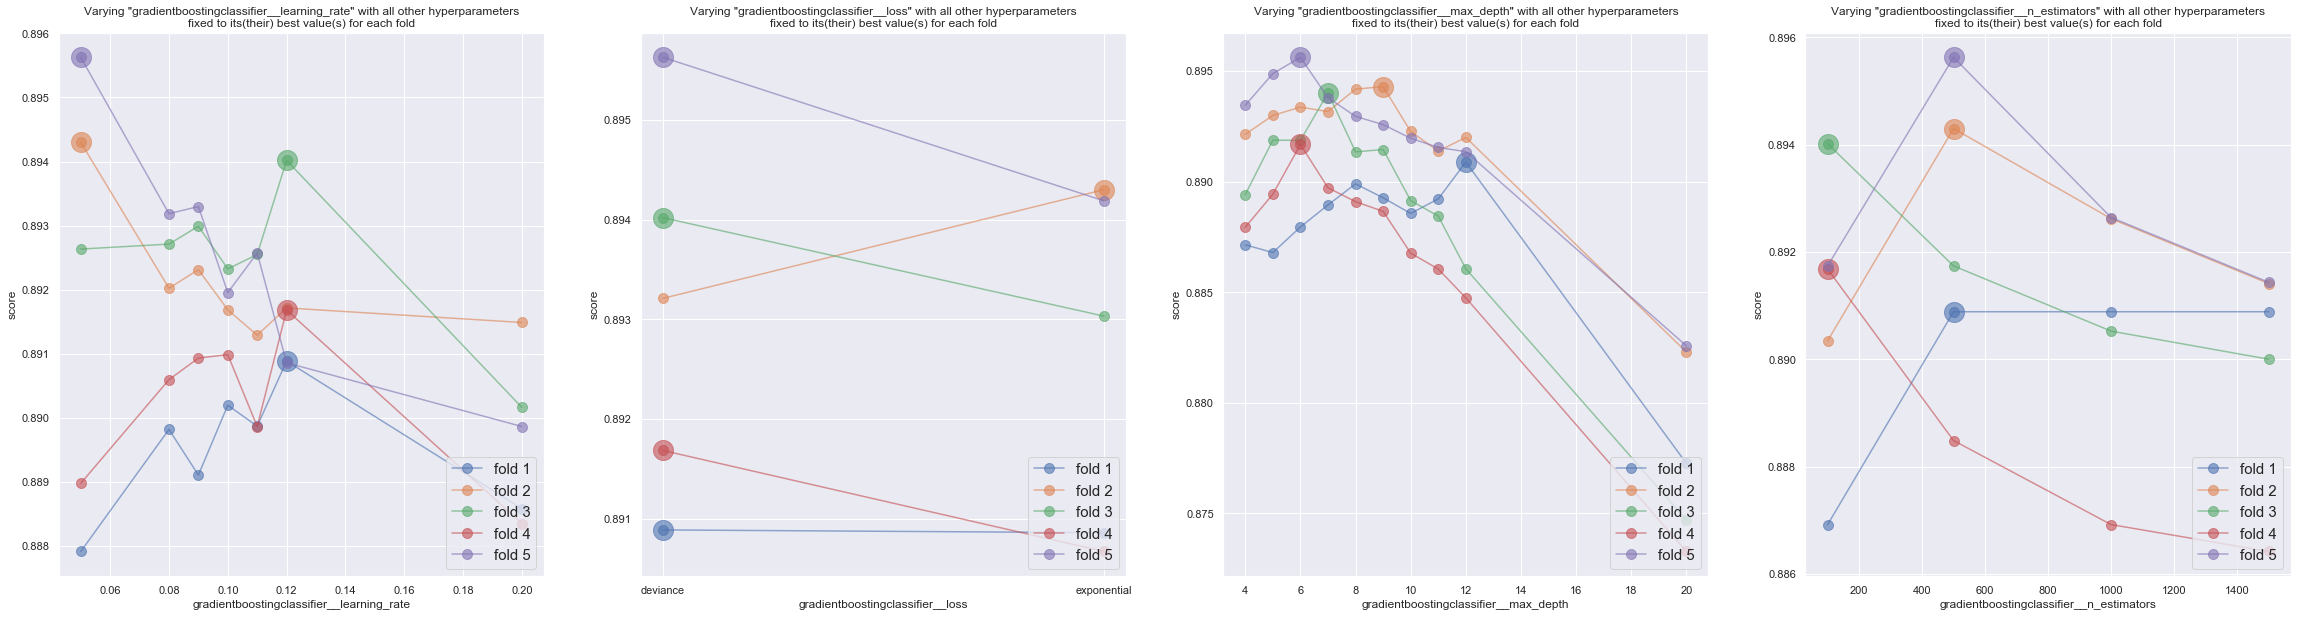

In [62]:
job.metrics.plot_grid_search_results(plot_error_bar = False)

In [55]:
summary.add(job.metrics, 'GradientBoosting', 'darkblue')

Fit model... done! (185.60s)


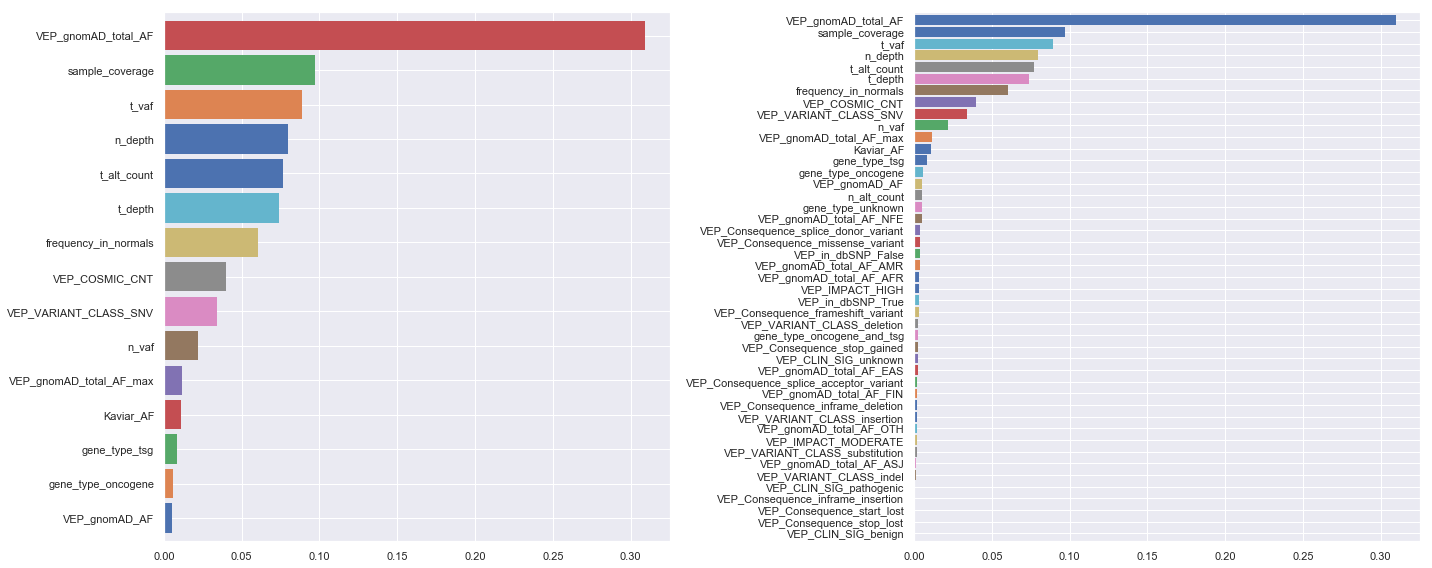

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

model_bestGB = make_pipeline(RandomUnderSampler(ratio='majority', random_state=42),
                             GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=1000, max_depth=10, loss='deviance'))

metrics = Metrics(model_bestGB, X, y, cv_strategy, n_jobs=5, run_model=False)
metrics.plot_features_importance(random_forest=False, pipeline_step_index=1)

## Summary

In [8]:
summary = Summary()
summary.load('summaries/algorithm_comparison_summary.pkl')

In [77]:
summary.save('summaries/algorithm_comparison_summary.pkl')

,test_average_precision_mean,test_roc_auc_mean,test_precision_mean,test_recall_mean,test_f1_mean,test_accuracy_mean
Uniform,0.0371,0.5,0.0373,0.505,0.0695,0.499
MostFrequent,0.0371,0.5,0,0,0,0.963
GausssianNaiveBayes,0.33,0.826,0.48,0.437,0.455,0.961
RidgeRegression,0.495,0.845,0.2,0.664,0.308,0.889
LassoRegression,0.496,0.845,0.198,0.665,0.305,0.888
kNN,0.475,0.86,0.185,0.692,0.292,0.876
SVM,0.446,0.857,0.228,0.674,0.341,0.903
RandomForest,0.588,0.894,0.226,0.734,0.346,0.897
GradientBoosting,0.588,0.897,0.209,0.763,0.328,0.884


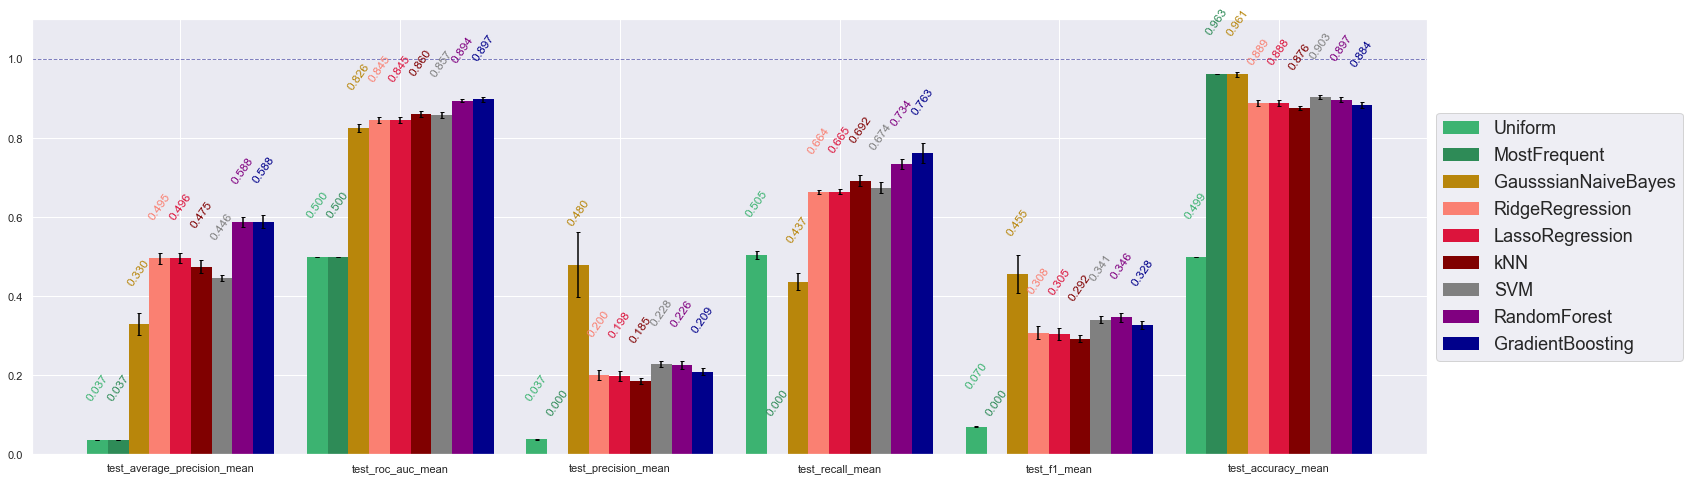

In [9]:
summary.display()
summary.plot()

In [86]:
get_table(data.impact['is_artefact'])

,count_,freq_
False,187012,96.29%
True,7199,3.71%


<Figure size 432x288 with 0 Axes>

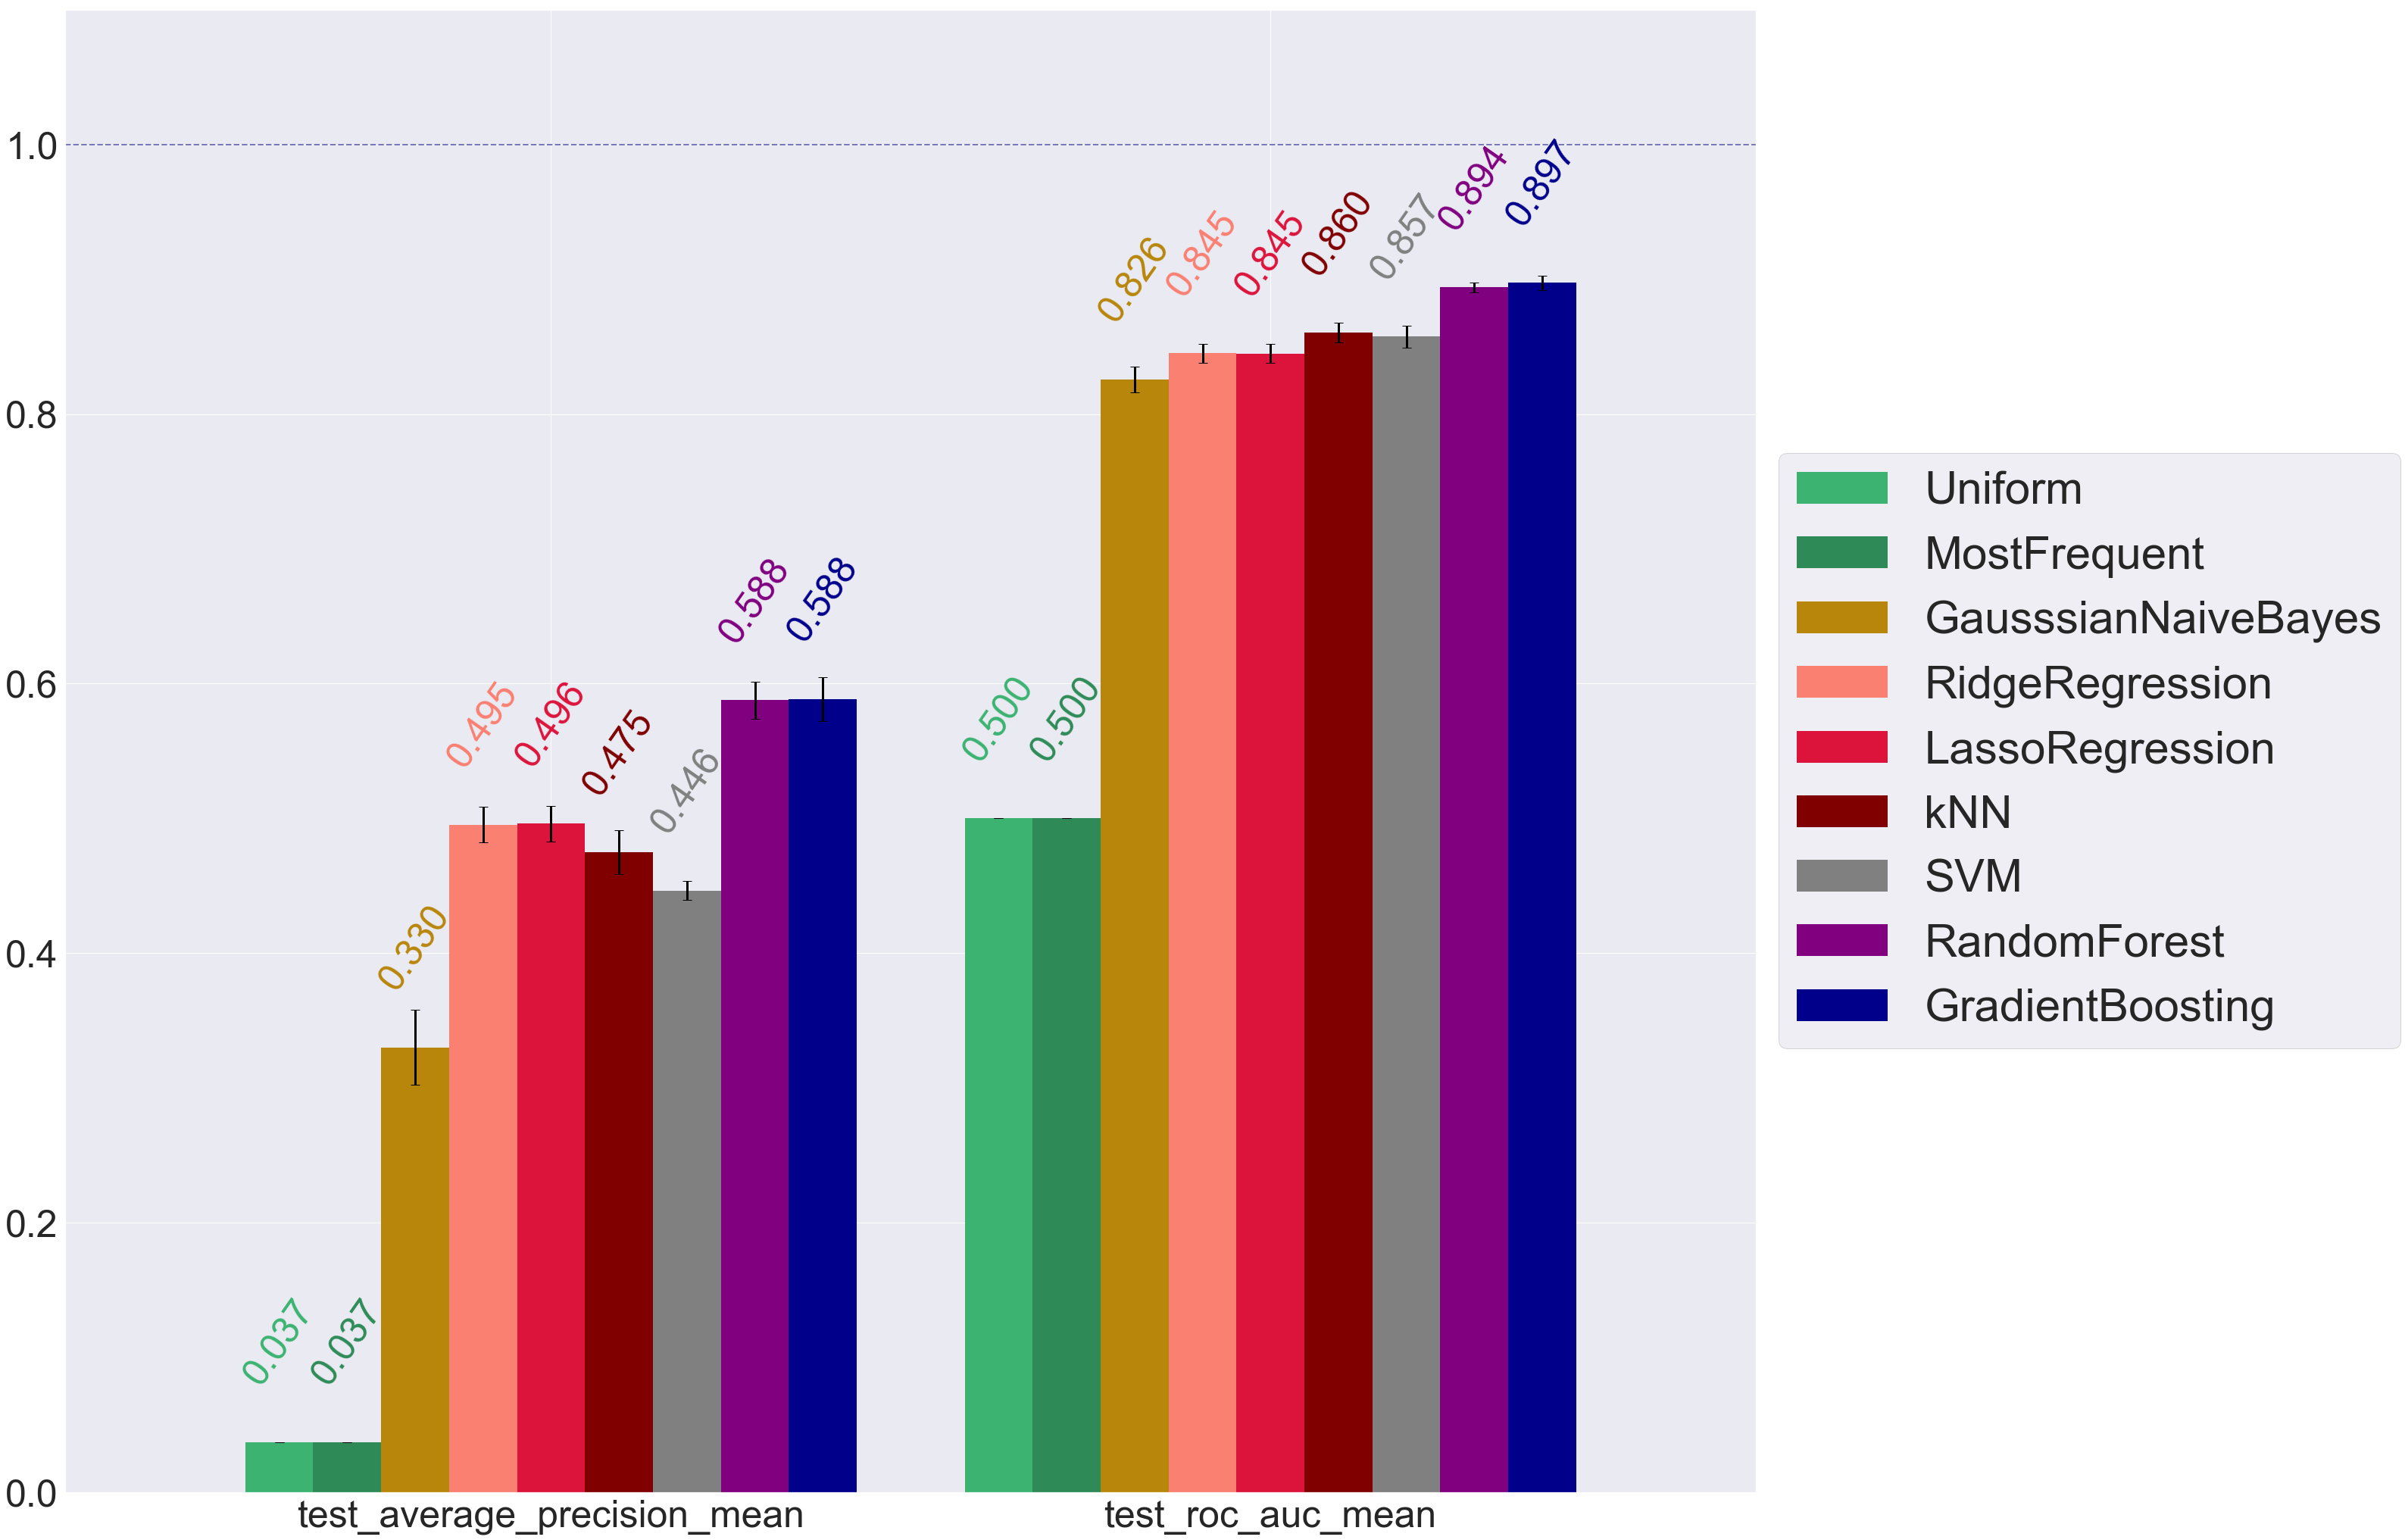

In [86]:
%run ../summary.py
summary = Summary(['average_precision', 'roc_auc'])
summary.load('summaries/algorithm_comparison_summary.pkl')
summary.plot_pres(figsize=(40, 36), fontsize=50)